<a href="https://colab.research.google.com/github/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/tutorials/T5_From_Photos_to_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From photos to embeddings: Computing embedding vectors via DINOv2

## 📌 Overview
The goal of this tutorial is to broaden your perspective on how to conduct data-driven analysis at scale within an architectural *context* by computing *building representations*.

More specifically, you will compute meaningful building aerial image features via pre-trained computer vision foundation models. Following the process, you will be able to interpret whether your machine can spot (dis)similar buildings. How exciting!

<center>
<img src="https://drive.google.com/uc?export=view&id=1jI2M-391LX1kzD2ceLi1GPJh3AynZq7u" alt="floor-layout" class="center" width="750px">
</center>

### 🧠 **Learning objectives**
- Generate image embeddings from pre-trained foundation models
- Compute the cosine similarity between embeddings
- Interpret *building+context* representations

### 🐍 **New in Python**
- Torch tensors: `torch`
- JSON and pickle imports/exports: `json`, `pickle`


### 🎨 1. Image Representation
- **Foundation models**: Learn about different machine learning models for image processing.
- **Embedding creation**: Learn how to create and use embeddings for image representation.

### 👥 2. Building similarity
- **Measure similarity**: Use data-driven methods to compute similarity.
- **Critical analysis**: Visualize and interpret the results.

### 💻 Assignment (Postponed)

In [ ]:
# import drive and os libraries
from google.colab import drive
import os

# mount google drive
drive.mount('/content/drive', force_remount=True)

# directory where the files are/will be stored
# (you can set the same directory as for the tutorial "From footprints to photos")
working_path = "/content/drive/MyDrive/voorhof_class"

# using chdir to change the directory
os.chdir(working_path)

Mounted at /content/drive


In [ ]:
# Hmmm, where are we?
os.getcwd()

'/content/drive/My Drive/voorhof_class'

If you have removed the directory we used for the tutorial "from_footprints_to_photos", please download the folder "aerial_images" through [this link](https://drive.google.com/drive/folders/1XEs7RnW3qymOrZRT7rObSYcL5TLVrhJl?usp=sharing) and place it within your working folder.

Let's display an image to see if everything is working fine.

Let's perform a simple but important task: loading and displaying an aerial image. Remember:
+ `PIL.Image`: A library that allows us to open images.
+ `matplotlib.pyplot`: A tool for displaying images and making visual plots.
+ `numpy`: A library that helps with handling numerical data efficiently, including image data.

Pay attention to the figure size: what is the height and width of the image?



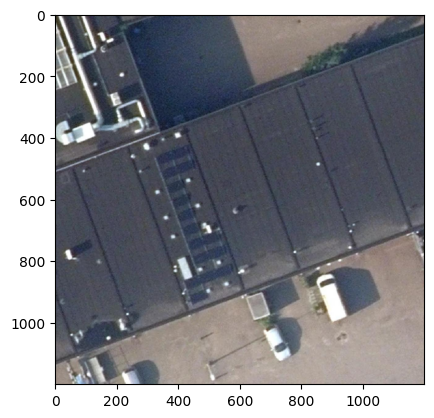


 (1200, 1200, 3)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img_test = Image.open("aerial_images/0503100000001941.jpg")
plt.imshow(np.array(img_test))
plt.show()
print("\n", np.array(img_test).shape)

Can we transform an image? Sure, we can!

Let's load an aerial image, resize it to 224x224 pixels, and display it.

+ `Image.open(...)` loads the image.
+ `.resize((224, 224))` scales it down, which reduces detail but speeds up processing.
+ `np.array(...)` converts it into numerical data for visualization.
+ `plt.imshow(...)` and `plt.show()` display the resized image.

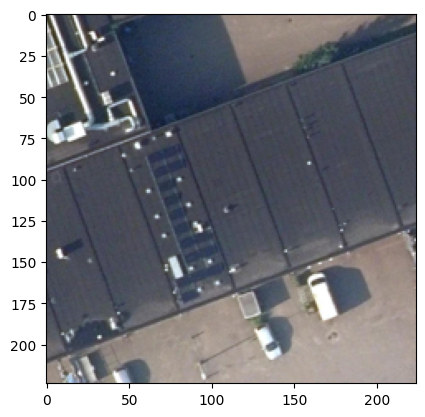


 (224, 224, 3)


In [ ]:
img_test = Image.open("aerial_images/0503100000001941.jpg")
img_test_resize = img_test.resize((224, 224))
plt.imshow(np.array(img_test_resize))
plt.show()
print("\n", np.array(img_test_resize).shape)

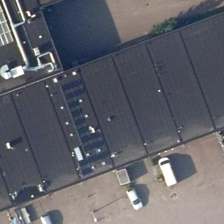

In [ ]:
img_test_resize

## Image representation: embeddings

Images contain a lot of info, and many many pixels. In many cases, a more compact and meaninful representation is preferred. (We live in a world full of information and need tools that will help us navigate around).
Let's compress the extracted aerial images into a vector representation through a deep learning foundation model. These models are trained on massive amounts of data, and provide a handy *foundation* for a wide range of tasks. In this case, you will compute vectors embeddings via [DINOV2](https://dinov2.metademolab.com/).

<center>
<img src="https://drive.google.com/uc?export=view&id=1c4OTYYQtDUpQM-j2-mrTB1oqT-yB1d6t" alt="floor-layout" class="center" width="450px">
</center>

If you think about it, this is great! Somebody else spent a lot of time, data, and compute time to provide as a very powerful model that we can use to obtain very meaninful representation for a wide range of tasks. Long live open-source deep learning!

### Transform aerial images

Well, DINO was receiving tons of images with a certain format and aspect, let's not confuse the model now. We will transform the extracted images according to what DINO *likes* to see as input.

In this code snippet, a new **very useful** package will be introduced: torch (a.k.a. PyTorch). This is one of the most used packages in the deep learning world. For more details, please follow amazing tutorials [here](https://pytorch.org/tutorials/beginner/basics/intro.html).

The most crucial concept you will need to understand now is that torch operates with **tensors**, which are very similar to (numpy) arrays, but with optimized features for efficient computing. In the following code snippet, you will convert images to a torch tensor (that would be a vector: 1D tensor). If we stack all images into the same tensor, we will then get a 2D tensor.

In [ ]:
# Get vector embeddings from a aerial images
# Load modules
import torch
import os
from PIL import Image
import torchvision.transforms as T

# This is the directory where the extracted images are stored
aerial_images_path = "aerial_images"

# Specify here which transformations will be applied to the image
transform = T.Compose([
    T.Resize(224, interpolation=T.InterpolationMode.BICUBIC),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# Prepare a list with all images filenames to run everything in a loop fashion
transformed_images = [] # Initialize a list for the transformed images
list_build_images = [] # This list will contain the building ids

# And here comes the loop iterating over all images
for img_filename in os.listdir(aerial_images_path):
    img_path = os.path.join(aerial_images_path, img_filename) # Combine path and image name
    list_build_images.append(img_filename.split('.')[0]) # Append the building id to the list
    print(img_path) # Let's print out the processed images

    if os.path.isfile(img_path):
        img = Image.open(img_path) # The image is opened by PIL Image function (Think of PIL as a translator)
        t_img = transform(img) # The transformation is now applied here
        transformed_images.append(t_img)  # Append the transformed image to the list

aerial_images/0503100000000172.jpg
aerial_images/0503100000018967.jpg
aerial_images/0503100000037147.jpg
aerial_images/0503100000037141.jpg
aerial_images/0503100000037118.jpg
aerial_images/0503100000027033.jpg
aerial_images/0503100000037123.jpg
aerial_images/0503100000037132.jpg
aerial_images/0503100000037146.jpg
aerial_images/0503100000037127.jpg
aerial_images/0503100000037128.jpg
aerial_images/0503100000027032.jpg
aerial_images/0503100000023405.jpg
aerial_images/0503100000031586.jpg
aerial_images/0503100000037163.jpg
aerial_images/0503100000037150.jpg
aerial_images/0503100000001944.jpg
aerial_images/0503100000037137.jpg
aerial_images/0503100000037116.jpg
aerial_images/0503100000037140.jpg
aerial_images/0503100000037154.jpg
aerial_images/0503100000018971.jpg
aerial_images/0503100000031516.jpg
aerial_images/0503100000037165.jpg
aerial_images/0503100000037142.jpg
aerial_images/0503100000037119.jpg
aerial_images/0503100000037143.jpg
aerial_images/0503100000037126.jpg
aerial_images/050310

For bookkeeping purposes, let's check the dimensionality of one transformed image:

In [ ]:
print(transformed_images[0].shape)
print(3*224*224)
print(transformed_images[0])

torch.Size([3, 224, 224])
150528
tensor([[[ 0.3823,  0.9988,  0.9817,  ..., -0.7137, -0.6794, -0.5938],
         [ 1.1187,  0.9132,  0.3823,  ..., -0.7650, -0.6281, -0.7308],
         [ 0.5022,  0.4337,  0.9474,  ..., -0.7479, -0.6794, -0.7308],
         ...,
         [-1.0904, -1.0390, -0.9534,  ..., -1.3473, -1.3130, -1.3302],
         [-1.0904, -1.0219, -0.9020,  ..., -1.2959, -1.1589, -1.2959],
         [-1.1075, -0.9705, -0.9020,  ..., -1.2103, -1.2445, -1.2103]],

        [[ 0.5028,  1.1506,  1.1331,  ..., -0.5301, -0.4951, -0.4076],
         [ 1.2731,  1.0630,  0.5203,  ..., -0.5651, -0.4426, -0.5476],
         [ 0.6604,  0.5728,  1.0980,  ..., -0.5651, -0.4951, -0.5476],
         ...,
         [-0.6702, -0.6527, -0.6176,  ..., -0.7927, -0.7402, -0.7577],
         [-0.6877, -0.6527, -0.5651,  ..., -0.8102, -0.6527, -0.7927],
         [-0.6877, -0.6001, -0.5651,  ..., -0.7577, -0.7927, -0.7577]],

        [[ 0.7402,  1.3677,  1.3677,  ..., -0.0964, -0.0615,  0.0256],
         [ 1

In [ ]:
# Convert list of tensors to a single 4D tensor (Recall: one image would be a 3D tensor)
tensor_images = torch.stack(transformed_images)

# tensor_images is now a 4D tensor of shape [N, C, H, W], where N is the number of images
print(tensor_images.shape)

torch.Size([50, 3, 224, 224])


➕ DINO, additional resources

Once the images are transformed, you will enjoy the power of DINO. Please find some additional resources below because I know you will want to learn more about DINO once you have tried it, trust me!

Please find a list of relevant papers:
- ViT: https://arxiv.org/abs/2010.11929
- DINOv2: https://arxiv.org/abs/2304.07193
- DINO + registers: https://arxiv.org/abs/2309.16588

And, we cannot avoid including also a diagram of the vision transformer, which is the building block of DINO.

<center>
<img src="https://drive.google.com/uc?export=view&id=1plA_BHtDJEher_962Ho2L9193Y1xgLF1" alt="floor-layout" class="center" width="750px">
</center>

### DINOV2 pre-trained model
There are DINO model for all tastes! As mentioned before, these models have already been pre-trained. Depending on the task at hand and the available compute, one can select a certain model.
Select a specific pre-trained DINOV2 model from the list below. To avoid heavy downloads, we will go for the lightest model in this tutorial: `dinov2_vits14_reg`
```
### DINOv2 pre-trained models ###
# DINOv2
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dinov2_vitb14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14')
dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dinov2_vitg14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14')

# DINOv2 with registers
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')
dinov2_vitb14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
dinov2_vitl14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14_reg')
dinov2_vitg14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14_reg')
```

Let's download the model here below (one line of code). These folks from Facebook Research really make it easy.

In [ ]:
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_reg4_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_reg4_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 103MB/s]


### Building + context compressed in a vector representation
Let's now compute the embedding for the set of buildings through only 2 additional lines of code. (It is great to live in this deep learning era. Previously, people had to train a model from scratch to this task).

In [ ]:
with torch.no_grad(): # Bonus points for whoever guess what this is for!
    tile_embed = dinov2_vits14_reg(tensor_images) # Here the magic happens, we plug the tensor of images to DINO and get a compressed representation for free.

print(tile_embed.shape) # Just to check the shape of the tensor
print(tile_embed[0].shape)

torch.Size([50, 384])
torch.Size([384])


In [ ]:
import json

# In case you would like to store the computed tensor, why not?
os.makedirs('embeddings', exist_ok=True)

torch.save(tile_embed, 'embeddings/vorhof_0_50.pt')
#loaded_embedding = torch.load('embeddings.pt')

# store building ids as a json file
with open('embeddings/vorhof_0_50.json', 'w') as f:
    json.dump(list_build_images, f)

## Will our machine be able to spot similar buildings from image embedding representations?

For this exercise, our machine will understand that two representations are similar based on cosine similarity, which is computed from image embeddings.

Specifically, we will compute cosine similarity between two (compressed) building aerial images. The cosine similarity between two feature vectors $p$ and $q$ with $n$ elements, and with coordinates $p_1, p_2, \ldots, p_n$ and $q_1, q_2, \ldots, q_n$ respectively, is given by:

$$s \,(p, q) = \frac{p \cdot q}{||p|| \, ||q||} = \frac{p_1 \cdot q_1 + p_2 \cdot q_2 + \cdots + p_n \cdot q_n} { \sqrt{p_1^2 + p_2^2 + \cdots + p_n^2} \, \sqrt{q_1^2 + q_2^2 + \cdots + q_n^2}}$$

<center>
<img src="https://drive.google.com/uc?export=view&id=12JRgwfPpOCfSSE8_oX6oYyUoIEwVr4DG" alt="floor-layout" class="center" width="500px">
</center>

To do so, we will write down a function that computes the cosine similarity for us.

### Compute *building* (cosine) similarity

In [ ]:
# Define the function to compute Euclidean distances
def cosine_similarity(x):
    num_samples = x.size(0) # Size of our tensor
    similarity = torch.zeros((num_samples, num_samples)) # Initialize a tensor where the distances will be stored

    # Looping over the elements in the tensor
    # We will compute the distance of all elements with all elements
    for i in range(num_samples):
        for j in range(num_samples):
            # Compute the Euclidean distance between x[i] and x[j]
            similarity[i, j] = torch.dot(x[i], x[j]) / torch.norm(x[i], p=2) / torch.norm(x[j], p=2)

    return similarity

🪄 Once the function is defined, we can easily compute similarity among all building aerial images through:
+ The stored vector representation (embeddings)

In [ ]:
# Compute cosine similarity (embedding representation)
similarity = cosine_similarity(tile_embed)

🤔 Let's visualize the computed similarities among our 50 building aerial images!

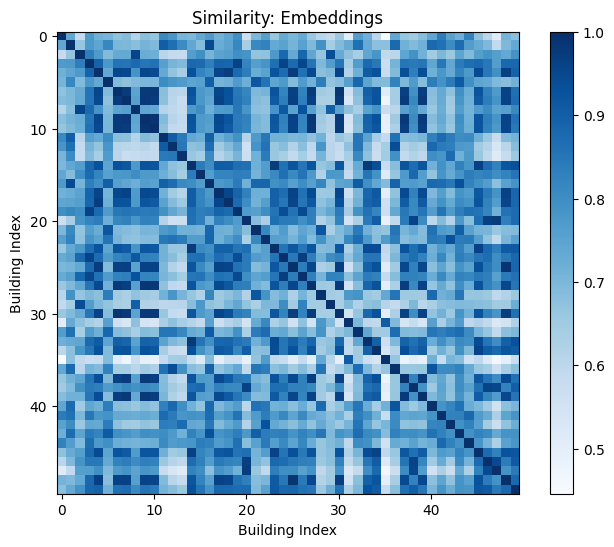

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distance matrix
figs, axs = plt.subplots(1, 1, figsize=(8, 6))

im2 = axs.imshow(similarity, interpolation='nearest', cmap='Blues')
figs.colorbar(im2, ax=axs)
axs.set_title('Similarity: Embeddings')
axs.set_xlabel('Building Index')
axs.set_ylabel('Building Index')

# plt.tight_layout()
plt.show()

### Find and explore the most (dis)similar buildings
This is now a very exciting exercise, we ask our machine to tell us which buildings are similar (or dissimilar) from a particular building, which we will denote as **query building**. To do (and as usual), we will quickly set up a function.

This function receives as input:
- The *similarity* tensor we computed previously
- The query building
- The full list of building indices
- The number of buildings most (dis)similar to the query building

The output includes:
- The most similar buildings `building_indices_max`
- The most different buildings `building_indices_min`

In [ ]:
def get_similar_building(similarity, query_building, building_indices, n_builds):

    # Retrieve the index within the tensor
    index_query_tensor = building_indices.index(query_building)

    distance_from_query = similarity[index_query_tensor]

    # Use torch.topk to find the top 5 values and their indices
    values_min, indices_min = torch.topk(distance_from_query * -1, n_builds)
    values_min = values_min * -1
    values_max, indices_max = torch.topk(distance_from_query, n_builds)

    # Convert torch indices to a list of building indices
    building_indices_min = [building_indices[item] for item in indices_min.tolist()]
    building_indices_max = [building_indices[item] for item in indices_max.tolist()]

    return building_indices_min, building_indices_max

In [ ]:
list_build_images.index("0503100000008874")

35

💫 You can now run the function for a particular query building.

In [ ]:
query_building = "0503100000000172" # Query building
n_builds = 5

# (Dis)similar images "embedding representation"
less_similar_build, more_similar_build = get_similar_building(similarity, query_building, list_build_images, n_builds)

# Let's cross-check the results before visualizing them
# Yes, the most similar building should be the query itself :)
print('embeddings similarity:', more_similar_build, less_similar_build)

print('more similar:', more_similar_build)
print('less similar:', less_similar_build)

embeddings similarity: ['0503100000000172', '0503100000032957', '0503100000038135', '0503100000027032', '0503100000037140'] ['0503100000008874', '0503100000008873', '0503100000037153', '0503100000037154', '0503100000037147']
more similar: ['0503100000000172', '0503100000032957', '0503100000038135', '0503100000027032', '0503100000037140']
less similar: ['0503100000008874', '0503100000008873', '0503100000037153', '0503100000037154', '0503100000037147']


### Visualize and interpret the results

In [ ]:
def visualize_images(similar_build, dissimilar_build):

  # Get the path of the images
  filenames_sim = [f"aerial_images/{item}.jpg" for item in similar_build]
  filenames_dis = [f"aerial_images/{item}.jpg" for item in dissimilar_build]

  # Number of rows and columns for the grid
  n_rows = 2
  n_cols = len(filenames_sim)

  # Create the matplotlib grid for visualization
  fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2.5))

  for i in range(n_cols):
    # Load and visualize the image from similar_build
    image_sim = np.array(Image.open(filenames_sim[i]))
    axs[0, i].imshow(image_sim)
    axs[0, i].set_title(filenames_sim[i].split('/')[-1].split(".")[0])  # Optional: Show filename as title
    axs[0, i].axis('off')  # Hide axes for better visualization

    # Load and visualize the image from dissimilar_build
    image_dis = np.array(Image.open(filenames_dis[i]))
    axs[1, i].imshow(image_dis)
    axs[1, i].set_title(filenames_dis[i].split('/')[-1].split(".")[0])  # Optional: Show filename as title
    axs[1, i].axis('off')  # Hide axes for better visualization

  plt.tight_layout()
  plt.show()

Building similarity can be visualized below:

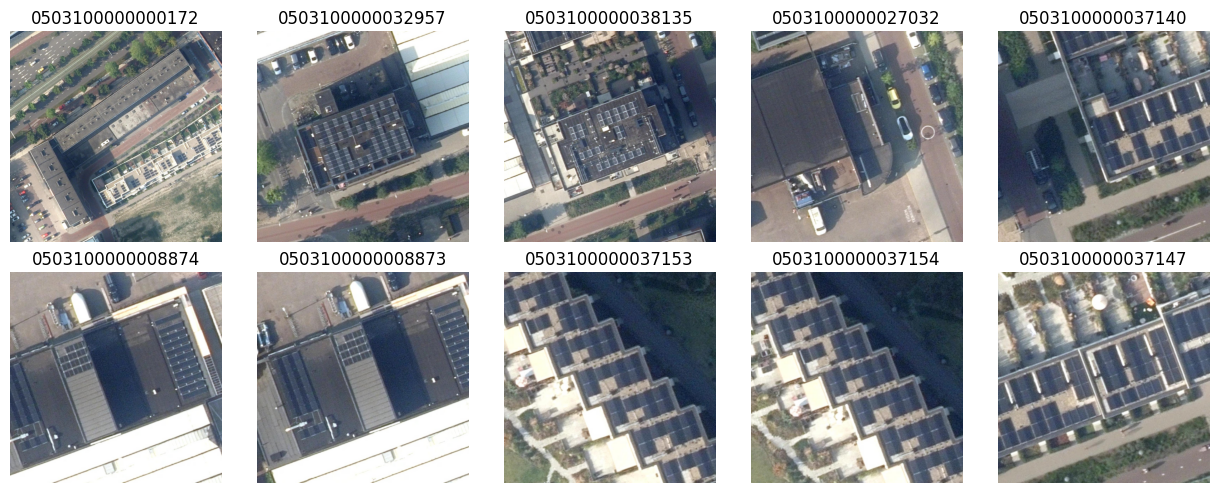

In [ ]:
visualize_images(more_similar_build, less_similar_build)

In [ ]:
print(list_build_images)

['0503100000000172', '0503100000018967', '0503100000037147', '0503100000037141', '0503100000037118', '0503100000027033', '0503100000037123', '0503100000037132', '0503100000037146', '0503100000037127', '0503100000037128', '0503100000027032', '0503100000023405', '0503100000031586', '0503100000037163', '0503100000037150', '0503100000001944', '0503100000037137', '0503100000037116', '0503100000037140', '0503100000037154', '0503100000018971', '0503100000031516', '0503100000037165', '0503100000037142', '0503100000037119', '0503100000037143', '0503100000037126', '0503100000018974', '0503100000037149', '0503100000037122', '0503100000008873', '0503100000023395', '0503100000037162', '0503100000037171', '0503100000008874', '0503100000008876', '0503100000037135', '0503100000037152', '0503100000037133', '0503100000008956', '0503100000032957', '0503100000023396', '0503100000001941', '0503100000038135', '0503100000037170', '0503100000037156', '0503100000037153', '0503100000037120', '0503100000037160']

### (Bonus) Buildings and cats together
You will now conduct an additional experiment to test the similarity between building and cat images. Is our machine able to distinguish them? Hmm, let's see..

PS. If you do not have any cat images and would like to try this experiment, you can find cat images in the directory `"cat_images"` by following [this link](https://drive.google.com/drive/folders/1XEs7RnW3qymOrZRT7rObSYcL5TLVrhJl?usp=sharing).

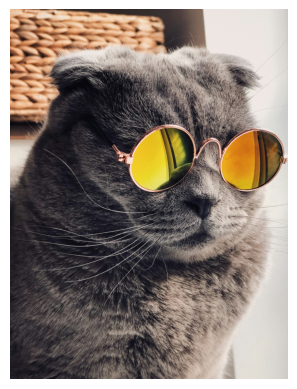

In [ ]:
img_cat = Image.open("cat_images/cat_image.jpg")
plt.imshow(np.array(img_cat))
plt.axis('off')
plt.show()

In [ ]:
# This is the directory where the extracted images are stored
cat_images_path = "cat_images"

# Specify here which transformations will be applied to the image
transform = T.Compose([
    T.Resize(256, interpolation=T.InterpolationMode.BICUBIC),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# Prepare a list with all images filenames to run everything in a loop fashion
cat_images = [] # Initialize a list for the transformed images

# And here comes the loop iterating over all images
for img_filename in os.listdir(cat_images_path):
    img_path = os.path.join(cat_images_path, img_filename) # Combine path and image name
    list_build_images.append(img_filename.split('.')[0]) # Append the building id to the list
    print(img_path) # Let's print out the processed images

    if os.path.isfile(img_path):
        img = Image.open(img_path) # The image is opened by PIL Image function (Think of PIL as a translator)
        t_img = transform(img) # The transformation is now applied here
        cat_images.append(t_img)  # Append the transformed image to the list

# Convert list of tensors to a single 4D tensor (Recall: one image would be a 3D tensor)
cat_images_tensor = torch.stack(cat_images)

# tensor_images is now a 4D tensor of shape [N, C, H, W], where N is the number of images
print(cat_images_tensor.shape)

cat_images/cat_image.jpg
cat_images/cat_image_1.jpg
cat_images/cat_image_2.jpg
torch.Size([3, 3, 224, 224])


In [ ]:
with torch.no_grad(): # Bonus points for whoever guess what this is for!
    cat_embed = dinov2_vits14_reg(cat_images_tensor) # Here the magic happens, we plug the tensor of images to DINO and get a compressed representation for free.

print(cat_embed.shape) # Just to check the shape of the tensor

torch.Size([3, 384])


In [ ]:
# concatenate building and cat embeddings
tile_combined = torch.cat((tile_embed, cat_embed), dim=0)
print(tile_combined.shape)

torch.Size([53, 384])


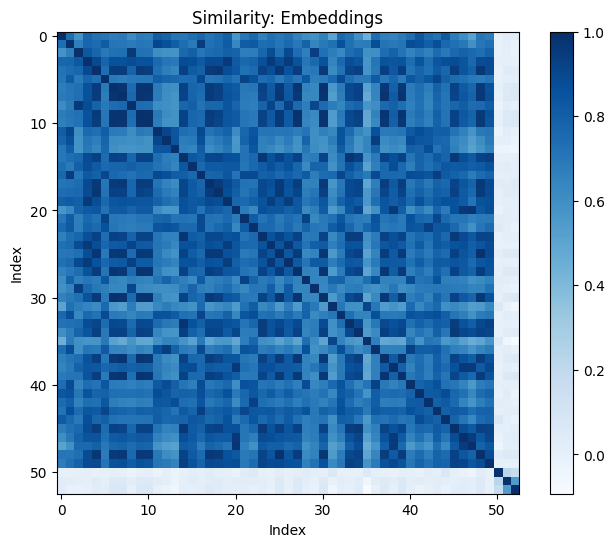

In [ ]:
# Compute cosine similarity (embedding representation)
similarity_combined = cosine_similarity(tile_combined)

# Plot the distance matrix
figs, axs = plt.subplots(1, 1, figsize=(8, 6))

im2 = axs.imshow(similarity_combined, interpolation='nearest', cmap='Blues')
figs.colorbar(im2, ax=axs)
axs.set_title('Similarity: Embeddings')
axs.set_xlabel('Index')
axs.set_ylabel('Index')

# plt.tight_layout()
plt.show()

In your opinion, do the results make sense?

We will focus on similarity among buildings in the next episode, where we will also include street-view images. Stay tuned!

# Additional topics

## How to install QGIS and PDOK's plugin?

You can install QGIS following the instructions provided [here](https://www.qgis.org/en/site/forusers/download.html).

Once QGIS is installed on your machine, you can add PDOK's plugin. To do that go to `Plugins/Manage and Install Plugins...` at the top bar, then search and add `PDOK services plugin`. You can find further instructions on how to add plugins [here](https://docs.qgis.org/2.18/en/docs/user_manual/plugins/plugins.html#:~:text=To%20install%20or%20activate%20a,C%3A%5CUsers%5C(user)%20.).

## JSON and Pickle loading and unloading

You may need to load/unload JSON and/or Pickle files in this tutorial/assignment. Please find some instructions below.

In [ ]:
# Don't forget to import json
import json

# Load a JSON file
with open('filename.json') as f:
    info_stored = json.load(f)

# Store a JSON file
with open('filename.json', 'w') as f: # Note we specify 'w' here
    json.dump(info_to_be_stored, f)

In [ ]:
# Don't forget to import pickle
import pickle

# Load a Pickle file
with open('filename.pkl', 'rb') as f: # Note that we specify 'rb' here
    info_stored = pickle.load(f)

# Store a Pickle file
with open('filename.pkl.pkl', 'wb') as f: # Note that we specify 'wb' here
    pickle.dump(info_to_be_stored, f)
